In [4]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import datetime
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import plotly.express as px
%matplotlib inline

In [5]:
# set file path to read CSV into a DataFrame
df = pd.read_csv("BitcoinSp500.csv")
#df.set_index("Date",inplace=True)
df

,Date,Bitcoin Price,S&P500 Price
0,11/28/2011,2.5,1192.55
1,11/29/2011,2.8,1195.19
2,11/30/2011,3.0,1246.96
3,12/1/2011,3.1,1244.58
4,12/2/2011,3.1,1244.28
...,...,...,...
2560,1/31/2022,38498.6,4515.55
2561,2/1/2022,38709.7,4546.54
2562,2/2/2022,36890.2,4589.32
2563,2/3/2022,37287.8,4477.44


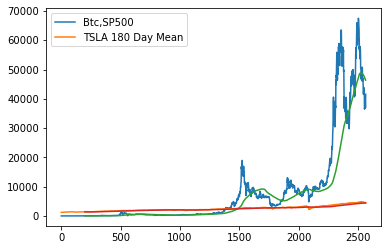

In [6]:
# Set figure of the daily closing prices of Tesla
ax = df.plot()

# Plot 180-Day Rolling Mean on the same figure
df.rolling(window=200).mean().plot(ax=ax)

# Set the legend of the figure
ax.legend(["Btc,SP500", "TSLA 180 Day Mean"]);

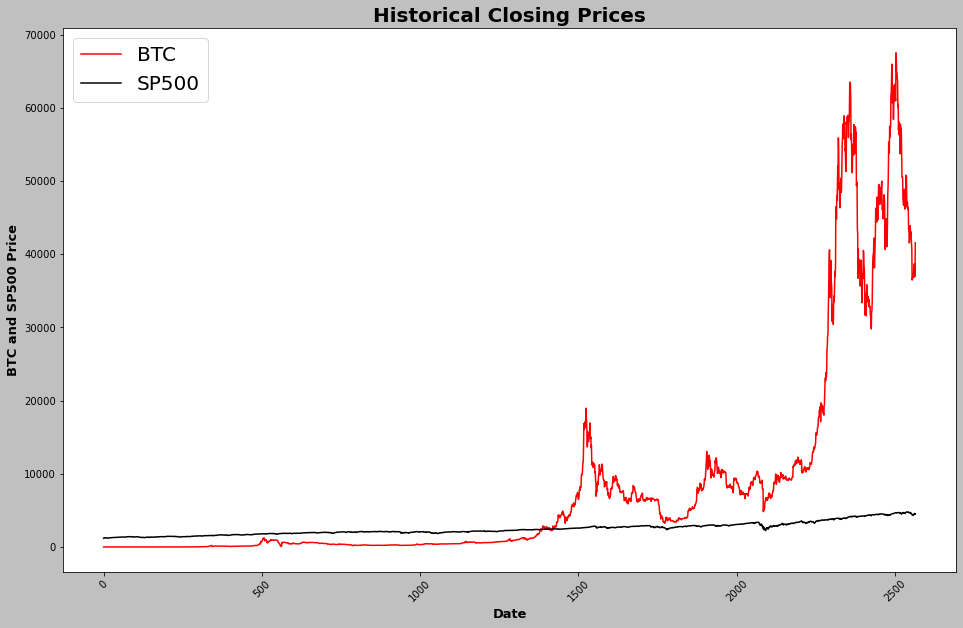

In [7]:
# Plot the Historical CLosing prices of bitcoin and sp500
plt.figure(figsize=(16,10),facecolor='silver')
plt.plot(df.index, df["Bitcoin Price"], label="BTC", color="red")
plt.plot(df.index, df["S&P500 Price"], label="SP500",color="black")
plt.xlabel("Date",fontweight="bold",size=13)
plt.ylabel("BTC and SP500 Price",fontweight="bold",size=13)
plt.legend(prop={"size":20})
plt.title("Historical Closing Prices",fontweight="bold",size=20)
plt.xticks(rotation=45)
plt.show()

In [4]:
df.hvplot(title="Bitcoin & SP500 Historical Closing Prices",kind="line",
                        grid=True,xlabel='Date',ylabel='Bitcoin & SP500 Close Price',color="green",
          legend="top",fontsize=12,frame_width=900,height=600,ylim=(0,5000),rot=90)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

<AxesSubplot:title={'center':'Bitcoin & SP500 Historical Closing Prices'}, xlabel='Date', ylabel='Bitcoin & SP500 Close Price'>

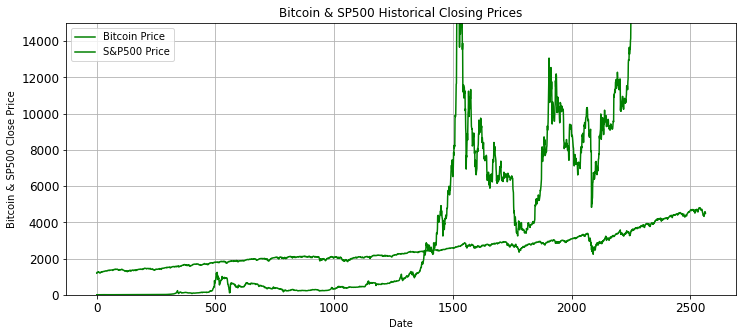

In [5]:
close_plot = df.plot(ylim=(0,15000),figsize=(12,5),title="Bitcoin & SP500 Historical Closing Prices",
                            grid=True,xlabel='Date',ylabel='Bitcoin & SP500 Close Price',color="green",
                            legend="top",fontsize=12)
close_plot

In [6]:
# Plot the price difference between Spy and Vgt
price_diff_df = pd.DataFrame()
price_diff_df["Date"] = df["Date"]
price_diff_df["BTC"] = df["Bitcoin Price"]
price_diff_df["SP500"] = df["S&P500 Price"]
price_diff_df["Price Difference"] = df["Bitcoin Price"] - df["S&P500 Price"]
price_diff_df = price_diff_df.set_index(pd.DatetimeIndex(price_diff_df["Date"].values))
price_diff_df.tail()

,Date,BTC,SP500,Price Difference
2022-01-31,1/31/2022,38498.6,4515.55,33983.05
2022-02-01,2/1/2022,38709.7,4546.54,34163.16
2022-02-02,2/2/2022,36890.2,4589.32,32300.88
2022-02-03,2/3/2022,37287.8,4477.44,32810.36
2022-02-04,2/4/2022,41567.6,4500.54,37067.06


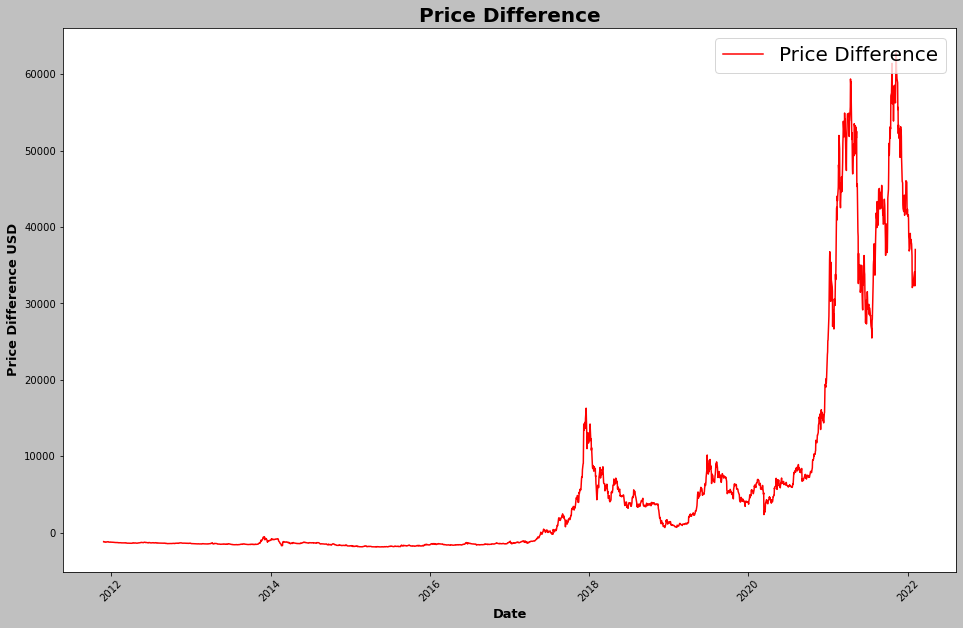

In [7]:
# Price Difference between Spy and Vgt. In 2018 there was a $90 difference in price. Around 2018 there was around a $90 price difference. In 2021 there is about a $30 difference.V
plt.figure(figsize=(16,10),facecolor='silver')
plt.plot(price_diff_df.index, price_diff_df["Price Difference"], label="Price Difference", color="red")
plt.xlabel("Date",fontweight="bold",size=13)
plt.ylabel("Price Difference USD",fontweight="bold",size=13)
plt.legend(loc="upper right",prop={"size":20})
plt.title("Price Difference",fontweight="bold",size=20)
plt.xticks(rotation=45)
plt.show()

In [8]:
# Getting daily returns 
daily_returns = df[["Bitcoin Price","S&P500 Price"]].pct_change(1)
daily_returns.head()
# Add column. corr between both

,Bitcoin Price,S&P500 Price
0,NaN,NaN
1,0.120000,0.002214
2,0.071429,0.043315
3,0.033333,-0.001909
4,0.000000,-0.000241


<AxesSubplot:>

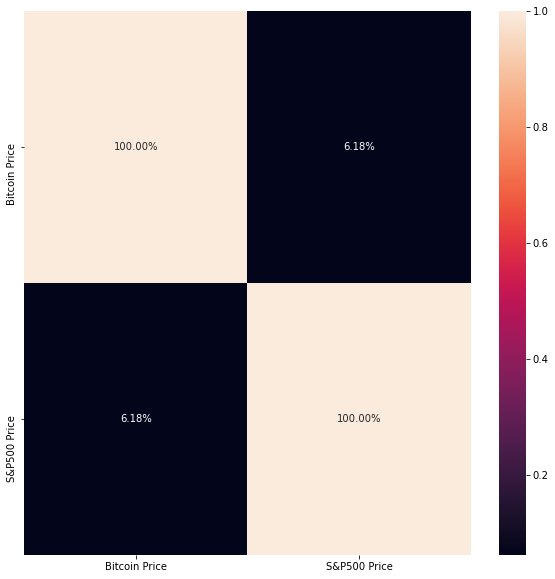

In [9]:
# Showing the correlation between both ETfs. Shows relationship between both etfs
plt.subplots(figsize=(10,10))
sns.heatmap(daily_returns.corr(), annot=True, fmt=".2%")

In [10]:
# Showing the covariance. Covariance shows how stocks move together.
daily_returns.cov()

,Bitcoin Price,S&P500 Price
Bitcoin Price,0.007612,0.000056
S&P500 Price,0.000056,0.000107


In [11]:
# Getting the volitility. Shows us how risky these ETFs are. Volitilty is variance squared. # SPY has lower volitility than VGT. These both have low volitility. VGT is more riskier. 
daily_returns.std()*100


Bitcoin Price    8.724513
S&P500 Price     1.036188
dtype: float64

In [12]:
# Show the average daily returns. We can expect SPY to give us around a .07 percent return based on the passed. We can expect VGT to give us around a .12 percent return based on the passed. VGT is more volitile but gives the more of a return compared to SPY
daily_returns.mean()*100

Bitcoin Price    0.613217
S&P500 Price     0.057204
dtype: float64

In [13]:
# Annualized returns. SPY will gives us about a 18% annual return. VGT will give us a 30% return. 
# VGT gives about 12% more return compared to SPY but it is more volitile.
daily_returns.mean()*100*252

Bitcoin Price    154.530658
S&P500 Price      14.415313
dtype: float64

In [47]:
df3.to_DataFrame()

AttributeError: 'Series' object has no attribute 'to_DataFrame'

In [14]:
# Make new columns to find the month&year together, and Month and Year by itself
df['Month_Year'] = pd.to_datetime(df['Date']).dt.to_period('M')
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df

,Date,Bitcoin Price,S&P500 Price,Month_Year,Year,Month
0,11/28/2011,2.5,1192.55,2011-11,2011,11
1,11/29/2011,2.8,1195.19,2011-11,2011,11
2,11/30/2011,3.0,1246.96,2011-11,2011,11
3,12/1/2011,3.1,1244.58,2011-12,2011,12
4,12/2/2011,3.1,1244.28,2011-12,2011,12
...,...,...,...,...,...,...
2560,1/31/2022,38498.6,4515.55,2022-01,2022,1
2561,2/1/2022,38709.7,4546.54,2022-02,2022,2
2562,2/2/2022,36890.2,4589.32,2022-02,2022,2
2563,2/3/2022,37287.8,4477.44,2022-02,2022,2


In [16]:
month_year = df.drop(columns=["Month","Year"])
month_year = month_year.set_index("Month_Year")
month_year

,Date,Bitcoin Price,S&P500 Price
Month_Year,,,
2011-11,11/28/2011,2.5,1192.55
2011-11,11/29/2011,2.8,1195.19
2011-11,11/30/2011,3.0,1246.96
2011-12,12/1/2011,3.1,1244.58
2011-12,12/2/2011,3.1,1244.28
...,...,...,...
2022-01,1/31/2022,38498.6,4515.55
2022-02,2/1/2022,38709.7,4546.54
2022-02,2/2/2022,36890.2,4589.32


<AxesSubplot:xlabel='Month_Year'>

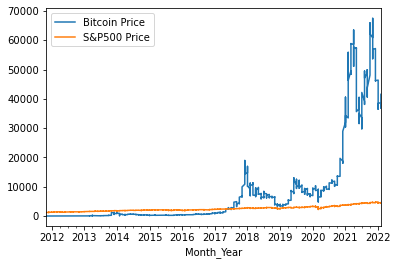

In [17]:
month_year.plot()

In [51]:
df4 = month_year.reset_index("")

,Bitcoin Price,S&P500 Price,Month_Year,Year,Month
Date,,,,,
11/28/2011,2.5,1192.55,2011-11,2011,11
11/29/2011,2.8,1195.19,2011-11,2011,11
11/30/2011,3.0,1246.96,2011-11,2011,11
12/1/2011,3.1,1244.58,2011-12,2011,12
12/2/2011,3.1,1244.28,2011-12,2011,12
...,...,...,...,...,...
1/31/2022,38498.6,4515.55,2022-01,2022,1
2/1/2022,38709.7,4546.54,2022-02,2022,2
2/2/2022,36890.2,4589.32,2022-02,2022,2


In [ ]:
df